In [ ]:
# Importuj potrzebne biblioteki
import torch
import matplotlib.pyplot as plt

# Zdefiniuj funkcję do obliczania pi przy użyciu symulacji Monte Carlo
def monte_carlo_pi(n_samples, device):
    # Wygeneruj losowe punkty w płaszczyźnie 2-wymiarowej
    x = torch.rand(n_samples, 2, device=device) 
    # Oblicz odległość każdego punktu od początku układu współrzędnych
    dist = x.norm(dim=1) 
    # Zlicz liczbę punktów wewnątrz koła jednostkowego
    inside = (dist <= 1).sum().to(torch.float32)
    # Oblicz szacowaną wartość pi
    pi = (inside / n_samples) * 4 
    return pi

# Liczba próbek do wygenerowania
n_samples = 100000

# Oblicz pi na CPU
device = 'cpu'
pi_cpu = monte_carlo_pi(n_samples, device)
print(f'Wartość pi dla {n_samples} punktów na CPU: {pi_cpu}')

# Oblicz pi na GPU
device = 'cuda'
pi_gpu = monte_carlo_pi(n_samples, device)
print(f'Wartość pi dla {n_samples} punktów na GPU: {pi_gpu}')


Wartość pi dla 100000 punktów na CPU: 3.1457600593566895
Wartość pi dla 100000 punktów na GPU: 3.1437199115753174


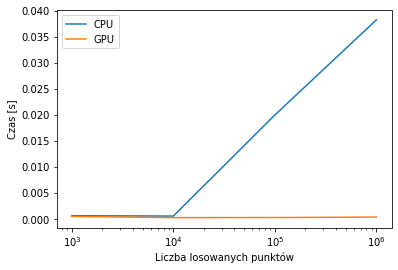

In [ ]:
# Import biblioteki do pomiaru czasu
import time

# Zdefiniuj zakres liczby próbek do wygenerowania
n_samples_range = [1000, 10000, 100000, 1000000]

# Listy do zapisywania czasów obliczeń na CPU i GPU
times_cpu = []
times_gpu = []

# Dla każdej liczby próbek:
for n_samples in n_samples_range:
    # Pomiar czasu rozpoczynający się przed obliczeniem pi na CPU
    start_time = time.time()
    monte_carlo_pi(n_samples, 'cpu')
    # Pomiar czasu kończący się po zakończeniu obliczeń na CPU
    end_time = time.time()
    # Zapisz różnicę między czasem końcowym i początkowym do listy times_cpu
    times_cpu.append(end_time - start_time)

    # Pomiar czasu rozpoczynający się przed obliczeniem pi na GPU
    start_time = time.time()
    monte_carlo_pi(n_samples, 'cuda')
    # Pomiar czasu kończący się po zakończeniu obliczeń na GPU
    end_time = time.time()
    # Zapisz różnicę między czasem końcowym i początkowym do listy times_gpu
    times_gpu.append(end_time - start_time)

# Wygeneruj wykres porównujący czas obliczeń na CPU i GPU
plt.plot(n_samples_range, times_cpu, label='CPU')
plt.plot(n_samples_range, times_gpu, label='GPU')
# Skaluj oś X logarytmicznie
plt.xscale('log')
plt.xlabel("Liczba losowanych punktów")
plt.ylabel("Czas [s]")
plt.legend()
plt.show()




